# Python foundation case study 1 - Retail case study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

## 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. 
### Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [2]:
customers = pd.read_csv("Customer.csv")
customers.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [4]:
prod_hierarchy = pd.read_csv("prod_cat_info.csv")
prod_hierarchy.rename(columns = {'prod_sub_cat_code' : 'prod_subcat_code'}, inplace = True)
prod_hierarchy.head(2)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [5]:
transactions = pd.read_csv("Transactions.csv")
transactions.head()
transactions['tran_date']  = transactions.tran_date.apply(lambda x : x.replace("/","-"))
transactions.iloc[141:156]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
141,88853694830,268444,13-02-2014,4,4,3,80,25.200,265.200,MBR
142,87149439767,273848,13-02-2014,6,5,3,1288,405.720,4269.720,TeleShop
143,89646857855,273598,13-02-2014,11,6,4,755,317.100,3337.100,MBR
144,12323853707,273552,12-2-2014,12,6,4,510,214.200,2254.200,TeleShop
145,60596009595,274652,12-2-2014,12,5,4,183,76.860,808.860,MBR
146,17146707816,274897,12-2-2014,12,5,3,622,195.930,2061.930,MBR
147,36792372906,275246,12-2-2014,2,6,1,1185,124.425,1309.425,e-Shop
148,38821078489,267025,12-2-2014,10,6,4,933,391.860,4123.860,e-Shop
149,23525861068,268100,12-2-2014,1,2,3,1318,415.170,4369.170,TeleShop
150,15403541663,266794,12-2-2014,3,2,2,322,67.620,711.620,e-Shop


In [6]:
data1 = pd.merge(left = transactions, right = prod_hierarchy, left_on=['prod_cat_code', 'prod_subcat_code'], right_on=['prod_cat_code', 'prod_subcat_code'], how ='left')
data1.rename(columns = {'cust_id' : 'customer_Id'}, inplace = True)
data1.head(2)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers


In [7]:
Customer_Final = pd.merge(left = data1, right = customers, left_on = 'customer_Id', right_on = 'customer_Id', how = 'left')
Customer_Final.head(2)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0


In [133]:
Customer_Final.isna().sum()

transaction_id      0
customer_Id         0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
DOB                 0
Gender              9
city_code           8
dtype: int64

In [8]:
Customer_Final.duplicated().sum()

13

In [9]:
Customer_Final.drop_duplicates(inplace = True)

In [10]:
Customer_Final

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,22-05-1970,M,2.0


## 2. Prepare a summary report for the merged data set.
### a. Get the column names and their corresponding data types

In [11]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23040 non-null  int64  
 1   customer_Id       23040 non-null  int64  
 2   tran_date         23040 non-null  object 
 3   prod_subcat_code  23040 non-null  int64  
 4   prod_cat_code     23040 non-null  int64  
 5   Qty               23040 non-null  int64  
 6   Rate              23040 non-null  int64  
 7   Tax               23040 non-null  float64
 8   total_amt         23040 non-null  float64
 9   Store_type        23040 non-null  object 
 10  prod_cat          23040 non-null  object 
 11  prod_subcat       23040 non-null  object 
 12  DOB               23040 non-null  object 
 13  Gender            23031 non-null  object 
 14  city_code         23032 non-null  float64
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


### b. Top/Bottom 10 observations

In [163]:
Customer_Final.head(10)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,1982-10-09,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,1971-11-04,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,1979-11-27,F,3.0


In [164]:
Customer_Final.tail(10)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,1982-01-15,M,1.0


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [165]:
Customer_Final.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,23040.0,5.006955e+10,2.898062e+10,3268991.000,2.493315e+10,5.009188e+10,7.532632e+10,9.998755e+10
customer_Id,23040.0,2.710219e+05,2.431574e+03,266783.000,2.689350e+05,2.709805e+05,2.731142e+05,2.752650e+05
prod_subcat_code,23040.0,6.148785e+00,3.726197e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,23040.0,3.763498e+00,1.677091e+00,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,23040.0,2.435764e+00,2.264326e+00,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,23040.0,6.370950e+02,6.217274e+02,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,23040.0,2.486775e+02,1.871883e+02,7.350,9.828000e+01,1.990800e+02,3.657675e+02,7.875000e+02
total_amt,23040.0,2.109865e+03,2.505610e+03,-8270.925,7.624500e+02,1.756950e+03,3.570255e+03,8.287500e+03
city_code,23032.0,5.483067e+00,2.863331e+00,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01


### d. Frequency tables for all the categorical variables

In [166]:
Customer_Final.loc[:,Customer_Final.dtypes == 'object'].describe().T

,count,unique,top,freq
Store_type,23040,4,e-Shop,9304
prod_cat,23040,6,Books,6066
prod_subcat,23040,18,Women,3046
Gender,23031,2,M,11804


In [167]:
cat_freq = Customer_Final.select_dtypes('object').columns
for col in cat_freq:
    print(Customer_Final[col].value_counts().reset_index())
    print("\n")

            index  Store_type
0          e-Shop        9304
1             MBR        4660
2  Flagship store        4575
3        TeleShop        4501


              index  prod_cat
0             Books      6066
1       Electronics      4895
2  Home and kitchen      4126
3          Footwear      2996
4          Clothing      2960
5              Bags      1997


                  index  prod_subcat
0                 Women         3046
1                  Mens         2910
2                  Kids         1997
3                 Tools         1061
4               Fiction         1043
5               Kitchen         1036
6              Children         1035
7               Mobiles         1030
8                Comics         1030
9                  Bath         1022
10           Furnishing         1007
11          Non-Fiction         1003
12                  DIY          989
13              Cameras          985
14  Personal Appliances          970
15             Academic          966
16     

## 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [168]:
continuous_var = Customer_Final.select_dtypes('number').columns
categorical_var = Customer_Final.select_dtypes('object').columns

In [169]:
continuous_var = ['transaction_id', 'customer_Id', 'prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'city_code']

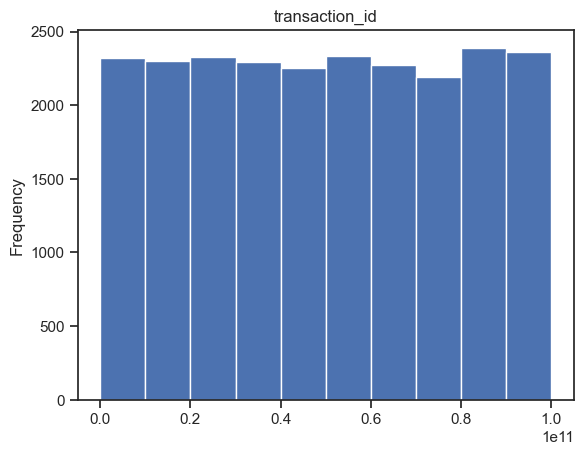

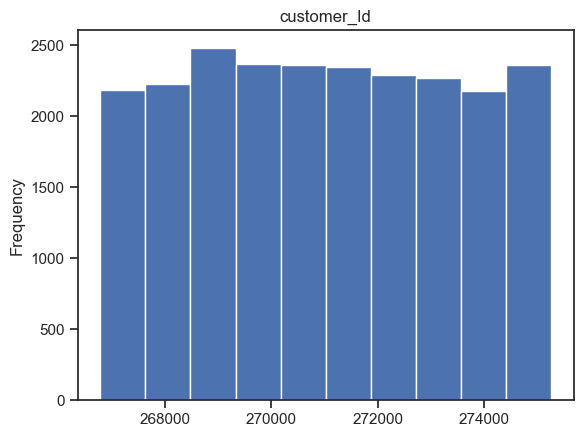

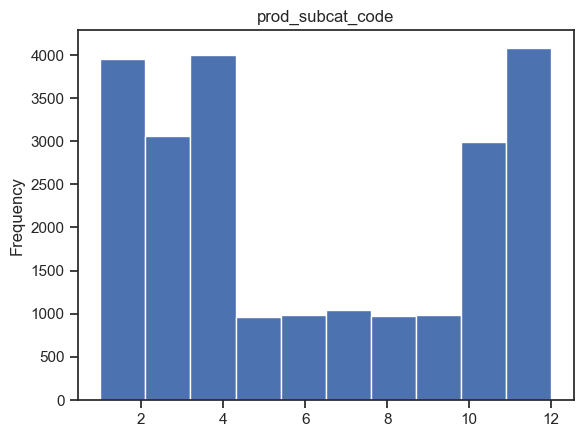

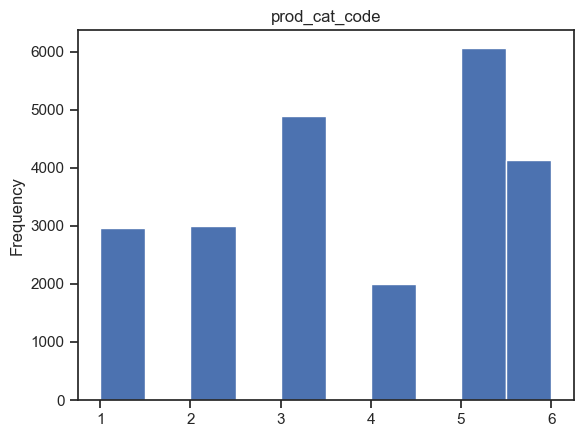

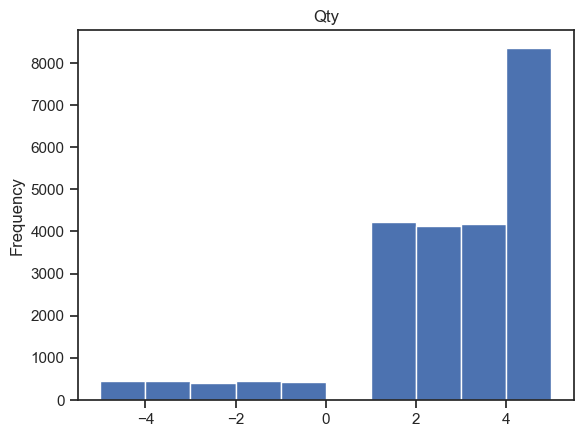

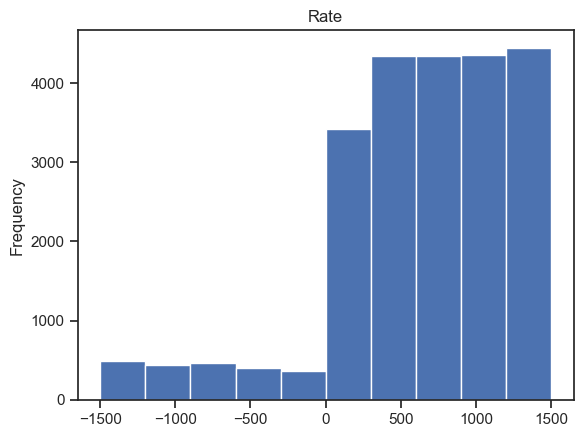

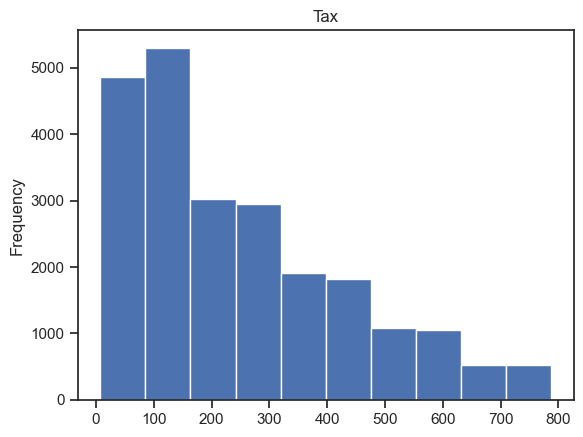

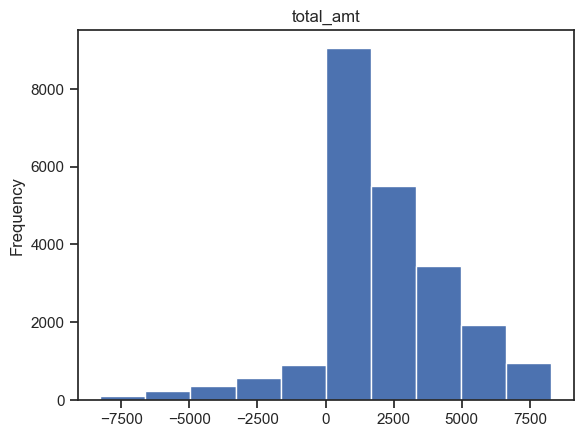

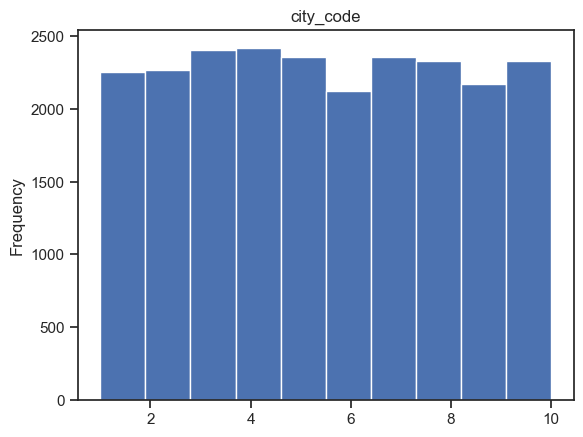

In [170]:
for col in continuous_var:
    Customer_Final[col].plot(kind = 'hist')
    plt.title(col)
    plt.show()
    
    

In [171]:
categorical_var = ['Store_type', 'prod_cat', 'prod_subcat', 'Gender']

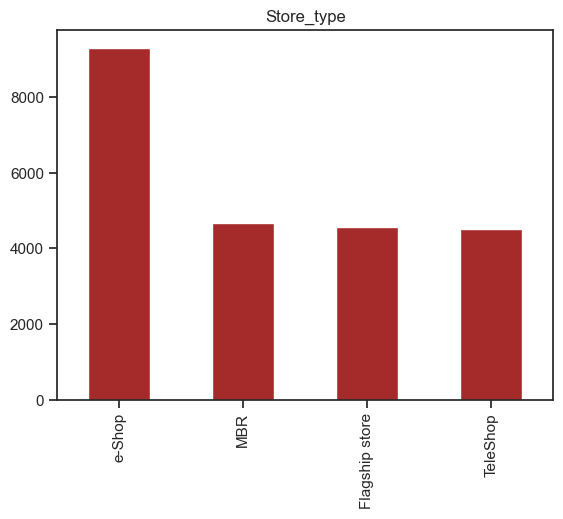

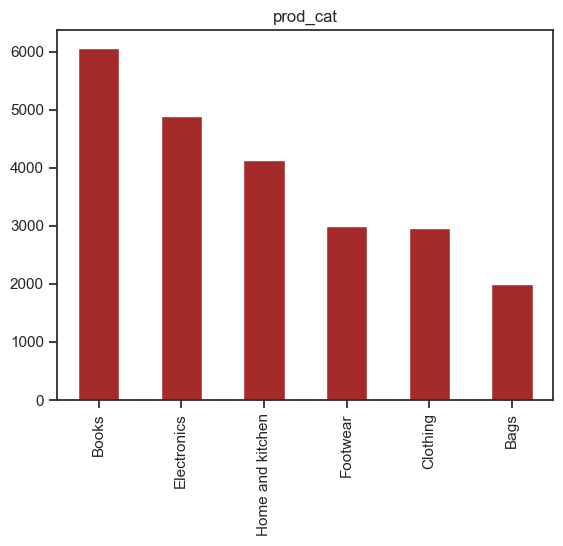

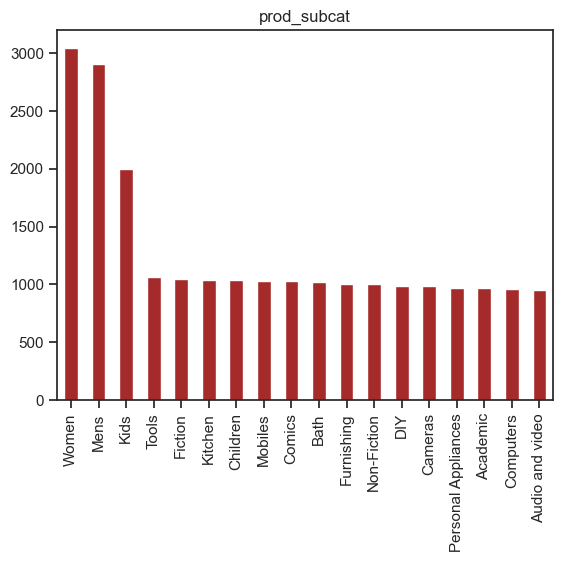

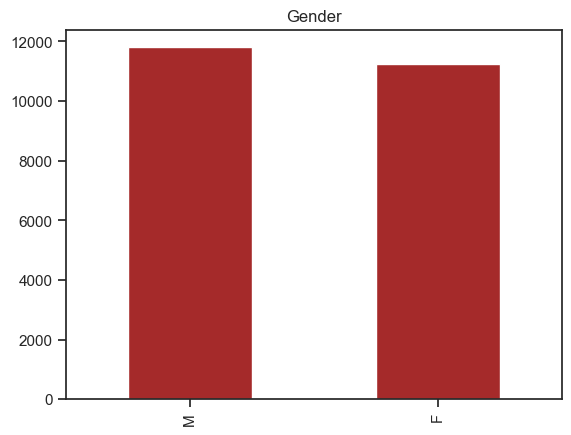

In [172]:
for col in categorical_var:
    Customer_Final[col].value_counts().plot(kind = 'bar', color = 'brown')
    plt.title(col)
    plt.show()

## 4. Calculate the following information using the merged dataset :
### a. Time period of the available transaction data
### b. Count of transactions where the total amount of transaction was negative

In [12]:
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format = '%d-%m-%Y')
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'], format = '%d-%m-%Y')

In [13]:
time_peroid = print("Time period of the available transaction data is from "+ pd.Timestamp.strftime(Customer_Final.tran_date.min() ,format="%d-%m-%Y") + " to " + pd.Timestamp.strftime(Customer_Final.tran_date.max(), format="%d-%m-%Y"))
time_peroid

Time period of the available transaction data is from 25-01-2011 to 28-02-2014


In [175]:
(Customer_Final.tran_date.max() - Customer_Final.tran_date.min()).days

1130

In [176]:
negative_trans = len(Customer_Final.loc[(Customer_Final.total_amt < 0)])
negative_trans

2164

## 5. Analyze which product categories are more popular among females vs male customers.

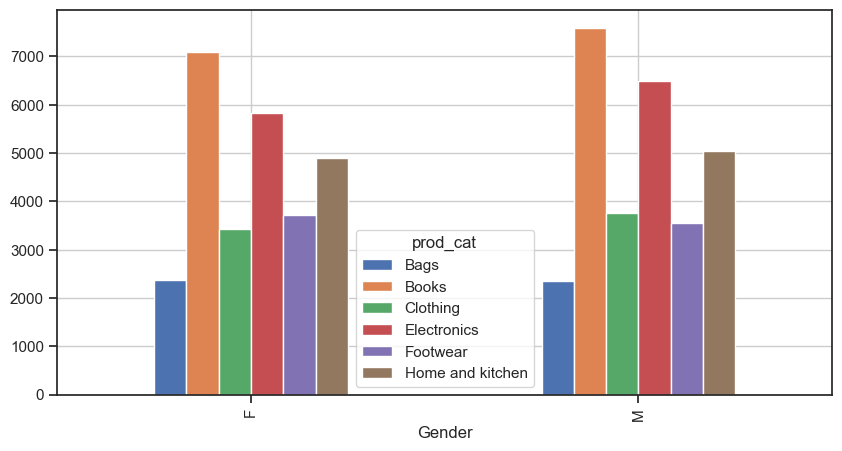

In [177]:
popular = Customer_Final.groupby(['Gender','prod_cat'])[['Qty']].sum()
test = pd.crosstab(index = Customer_Final.Gender, columns = Customer_Final.prod_cat, values = Customer_Final.Qty, aggfunc = 'sum')
test.plot(kind = 'bar', figsize = (10,5), grid = True)
plt.show()

In [178]:
popular = Customer_Final.groupby(['Gender','prod_cat'])[['Qty']].count()
pd.crosstab(index = Customer_Final.Gender, columns = Customer_Final.prod_cat, values = Customer_Final.Qty, aggfunc = 'sum')


prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


#### From the above crosstab it is clear that 'Bags' & 'Footwear' are more popular categories among Female customer vs Male customers

## 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [225]:
max_cust = Customer_Final.groupby('city_code')[['customer_Id']].count().reset_index().sort_values(by = 'customer_Id', ascending = False)
max_cust.rename(columns = {'customer_Id' : 'total_customers'}, inplace = True) 
max_cust['percentage_cust'] = round((max_cust.total_customers / max_cust.total_customers.sum())* 100, 2).astype(str) + " %"
max_cust.head(1)

,city_code,total_customers,percentage_cust
3,4.0,2422,10.52 %


## 7. Which store type sells the maximum products by value and by quantity?

In [241]:
Customer_Final.head()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0


In [232]:
Customer_Final.groupby("Store_type")[['Qty', 'total_amt']].agg('sum').sort_values(by = ['Qty', 'total_amt'], ascending = False).head(1)

,Qty,total_amt
Store_type,,
e-Shop,22790,1.984262e+07


## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [240]:
Customer_Final.loc[(Customer_Final.prod_cat.isin(('Electronics', 'Clothing'))) & (Customer_Final.Store_type == 'Flagship store')].groupby(['Store_type','prod_cat'])[['total_amt']].sum()

total_amt
Store_type     prod_cat               
Flagship store Clothing     1194423.23
               Electronics  2215136.04

## 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [243]:
Customer_Final.loc[(Customer_Final.Gender == 'M') & (Customer_Final.prod_cat == 'Electronics')].groupby(['prod_cat','Gender'])[['total_amt']].sum()

,,total_amt
prod_cat,Gender,
Electronics,M,5711351.62


## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [252]:
non_negative = Customer_Final.loc[Customer_Final.total_amt > 0]
non_negative.head()
max_trans = non_negative.groupby('customer_Id')[['transaction_id']].count().reset_index()
max_trans.loc[max_trans.transaction_id > 10]

,customer_Id,transaction_id
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


## 11. For all customers aged between 25 - 35, find out:
### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [14]:
age_between_25_35 = Customer_Final.loc[((pd.Timestamp.now().year - Customer_Final.DOB.dt.year)).between(25,35)]
age_between_25_35.loc[age_between_25_35.prod_cat.isin(('Electronics', 'Books'))].groupby('prod_cat')[['total_amt']].sum()

,total_amt
prod_cat,
Books,2667784.925
Electronics,2272602.670


In [15]:
Customer_Final['age'] = Customer_Final.DOB.apply(lambda x: pd.Timestamp.now() - pd.to_datetime(x))
Customer_Final['age'] = Customer_Final.age.apply(lambda x : round((x.days/365.25), 0))
age_between_25_35 = Customer_Final.loc[(Customer_Final.age.between(25,35)) & (Customer_Final.prod_cat.isin(("Books", "Electronics")))].groupby('prod_cat')[['total_amt']].sum()
age_between_25_35

,total_amt
prod_cat,
Books,2840878.755
Electronics,2531393.670


In [16]:
Customer_Final.age

0        41.0
1        50.0
2        31.0
3        42.0
4        31.0
         ... 
23048    51.0
23049    39.0
23050    47.0
23051    53.0
23052    41.0
Name: age, Length: 23040, dtype: float64

### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [17]:
age_25_35 = Customer_Final.loc[Customer_Final.age.between(25,35)] 

In [318]:
age_25_35 = age_25_35.loc[(age_25_35.tran_date >= pd.to_datetime('01-01-2014', format='%d-%m-%Y')) & (age_25_35.tran_date <= pd.to_datetime('01-03-2014', format = '%d-%m-%Y'))]

In [324]:
age_25_35.total_amt.sum()

590445.7

In [18]:
age_25_35 = age_25_35.loc[(age_25_35.tran_date.between(pd.to_datetime('01-01-2014', format='%d-%m-%Y'), pd.to_datetime('01-03-2014', format = '%d-%m-%Y')))]

In [19]:
age_25_35.total_amt.sum()

590445.7